In [1]:
import time

from model import WaveNetModel, Optimizer, WaveNetData

from IPython.display import Audio
from IPython.core.debugger import Tracer
from matplotlib import pyplot as plt
from matplotlib import pylab as pl
from IPython import display
import torch
import numpy as np

%matplotlib notebook

In [16]:
model = WaveNetModel(num_layers=11,
                     num_blocks=2,
                     num_classes=128,
                     hidden_channels=128)

print("model: ", model)
print("scope: ", model.scope)

data = WaveNetData('train_samples/saber.wav',
                   input_length=model.scope,
                   target_length=model.last_block_scope,
                   num_classes=model.num_classes)

model:  WaveNetModel (
  (main): Sequential (
    (b0-l0.wavenet_layer-d1): WaveNetLayer (
      (dil_conv): Conv1d(1, 128, kernel_size=(2,), stride=(1,), bias=False)
      (onexone_conv): Conv1d(128, 128, kernel_size=(1,), stride=(1,), bias=False)
    )
    (b0-l1.wavenet_layer-d2): WaveNetLayer (
      (dil_conv): Conv1d(128, 128, kernel_size=(2,), stride=(1,), bias=False)
      (onexone_conv): Conv1d(128, 128, kernel_size=(1,), stride=(1,), bias=False)
    )
    (b0-l2.wavenet_layer-d4): WaveNetLayer (
      (dil_conv): Conv1d(128, 128, kernel_size=(2,), stride=(1,), bias=False)
      (onexone_conv): Conv1d(128, 128, kernel_size=(1,), stride=(1,), bias=False)
    )
    (b0-l3.wavenet_layer-d8): WaveNetLayer (
      (dil_conv): Conv1d(128, 128, kernel_size=(2,), stride=(1,), bias=False)
      (onexone_conv): Conv1d(128, 128, kernel_size=(1,), stride=(1,), bias=False)
    )
    (b0-l4.wavenet_layer-d16): WaveNetLayer (
      (dil_conv): Conv1d(128, 128, kernel_size=(2,), stride=(1,), 

In [17]:
start_tensor = data.get_minibatch([model.scope])[0].squeeze()

plt.ion()
plt.plot(start_tensor[-200:].numpy())
plt.ioff()

In [20]:
optimizer = Optimizer(model,
                      learning_rate=0.01,
                      stop_threshold=0.1,
                      avg_length=4)

def hook(losses):
    ax.clear()
    ax.plot(losses)
    fig.canvas.draw()
    
optimizer.hook = hook

<IPython.core.display.Javascript object>


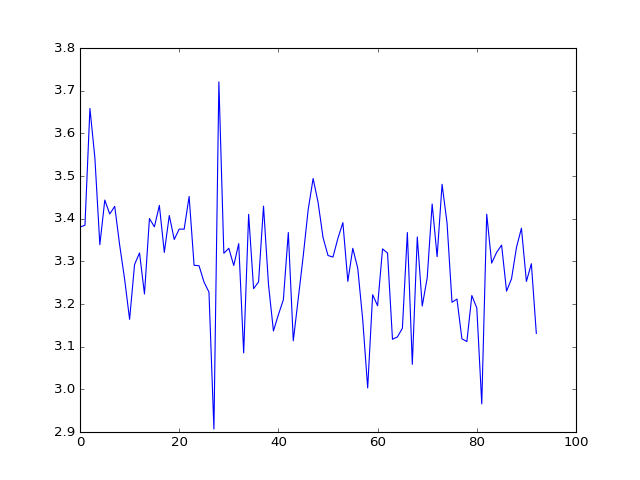

start training...


KeyboardInterrupt: 

In [23]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.ion()

fig.show()
fig.canvas.draw()

print('start training...')
tic = time.time()
optimizer.train(data)
toc = time.time()
print('Training took {} seconds.'.format(toc-tic))

In [ ]:
torch.save(model.state_dict(), "trained_state_bach_11025")